In [12]:
!nvidia-smi

Tue Jun  3 12:44:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   74C    P0             30W /   70W |    1161MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import os
from matplotlib import pyplot as plt
import numpy as np

In [14]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 32

In [4]:
train_data_dir = '/kaggle/input/fer-dataset-mod/train'
validation_data_dir = '/kaggle/input/fer-dataset-mod/test'

print('Image Loading...............')

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 30,
                    shear_range = 0.3,
                    zoom_range = 0.3,
                    horizontal_flip = True,
                    fill_mode = 'nearest'
                )

validation_datagen = ImageDataGenerator(rescale = 1./255)

Image Loading...............


In [5]:
train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode = 'grayscale',
                    target_size = (48, 48),
                    batch_size = 32,
                    class_mode = 'sparse',
                    shuffle = True
                )

validation_generator = validation_datagen.flow_from_directory(
                    validation_data_dir,
                    color_mode = 'grayscale',
                    target_size = (48, 48),
                    batch_size = 32,
                    class_mode = 'sparse',
                    shuffle = True
                )

print('Image Loading Done')

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Image Loading Done


In [ ]:
print(train_generator.num_classes) 


6


In [8]:
class_label = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
img, label = train_generator.__next__()

In [9]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748953693.880203      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748953693.881033      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [10]:
train_path = '/kaggle/input/fer-dataset-mod/train'
test_path = '/kaggle/input/fer-dataset-mod/test'

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    for file in files:
        num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    for file in files:
        num_test_imgs += len(files)

In [24]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[lr_reduction, early_stop]
)


Epoch 1/50
884/884 ━━━━━━━━━━━━━━━━━━━━ 92s 91ms/step - accuracy: 0.6627 - loss: 0.8868 - val_accuracy: 0.6580 - val_loss: 0.9281 - learning_rate: 0.0010
Epoch 2/50
884/884 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.6547 - loss: 0.9027 - val_accuracy: 0.6557 - val_loss: 0.9457 - learning_rate: 0.0010
Epoch 3/50
884/884 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.6602 - loss: 0.8973 - val_accuracy: 0.6460 - val_loss: 0.9791 - learning_rate: 0.0010
Epoch 4/50
884/884 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.6557 - loss: 0.9091 - val_accuracy: 0.6542 - val_loss: 0.9474 - learning_rate: 0.0010
Epoch 5/50
884/884 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.6557 - loss: 0.8981 - val_accuracy: 0.6621 - val_loss: 0.9345 - learning_rate: 0.0010
Epoch 6/50
884/884 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.6610 - loss: 0.8898 - val_accuracy: 0.6561 - val_loss: 0.9260 - learning_rate: 0.0010
Epoch 7/50
884/884 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.6644 - l

In [25]:
model.save('/kaggle/working/fer_30epochs3.h5')

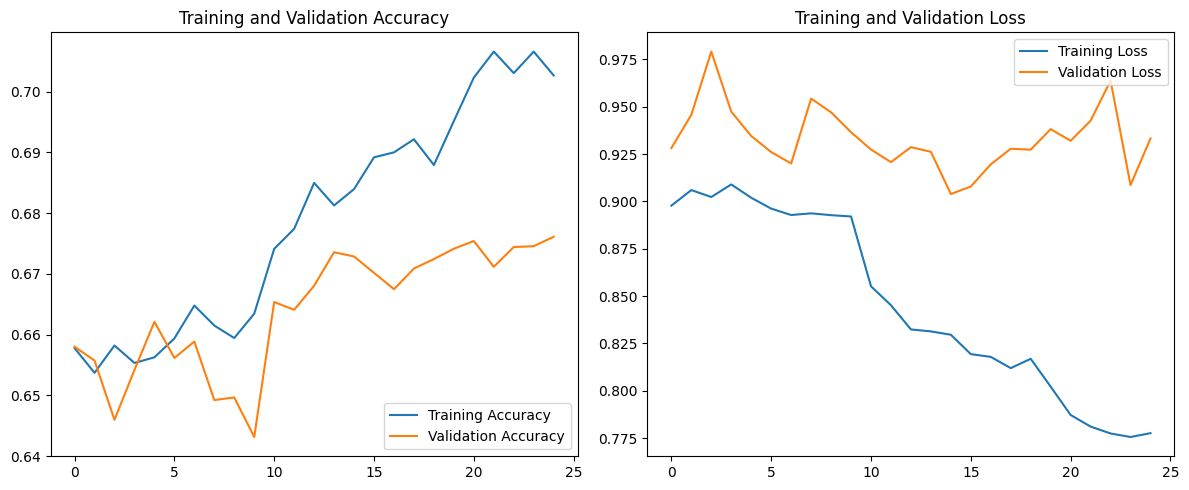

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step


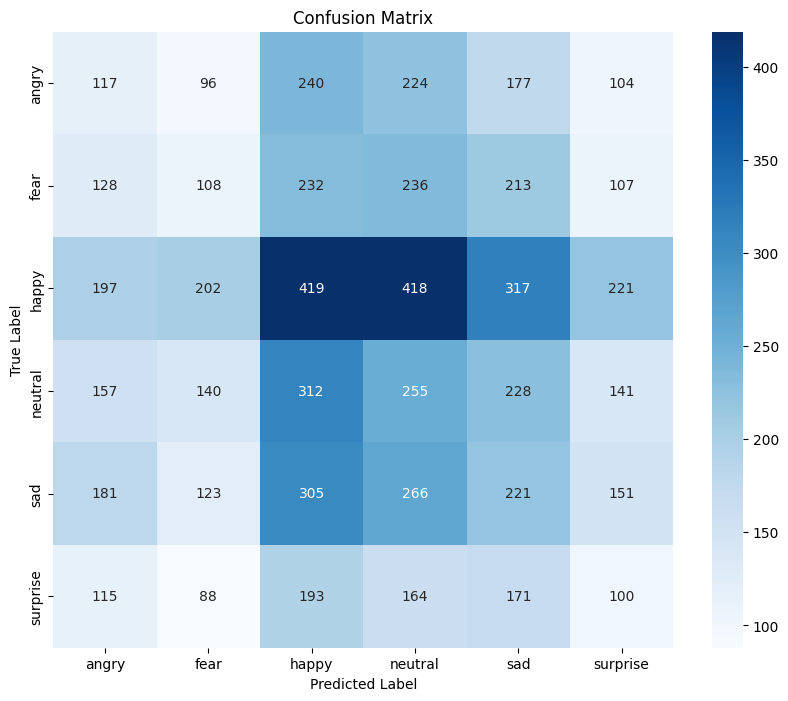

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
labels = list(validation_generator.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()